In [1]:
%matplotlib inline

In [3]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from datetime import datetime
from config import weather_api_key
from config import g_key

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
test = zip(lats, lngs)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create a list for holding in the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient amount.
if len(cities) <= 501:
    print("Please rerun the block.")

In [21]:
# Create building block for API access.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, set numbers, and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palpa
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | shelburne
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | dongkan
Processing Record 13 of Set 1 | san quintin
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | chushan
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | puerto madryn
Processing Record 20 of Set 1 | warrnambool
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | severo-kurilsk
Processing Record 23 of Set 1 | 

Processing Record 36 of Set 4 | sorong
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | haines junction
Processing Record 40 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | ust-ishim
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | carutapera
Processing Record 46 of Set 4 | kibakwe
Processing Record 47 of Set 4 | isla mujeres
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | bac lieu
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | gari
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | turki
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 5 | college
Processin

Processing Record 27 of Set 8 | hazorasp
Processing Record 28 of Set 8 | teknaf
Processing Record 29 of Set 8 | tuensang
Processing Record 30 of Set 8 | iqaluit
Processing Record 31 of Set 8 | oshkosh
Processing Record 32 of Set 8 | halalo
City not found. Skipping...
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | san juan
Processing Record 35 of Set 8 | stornoway
Processing Record 36 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 8 | prince rupert
Processing Record 38 of Set 8 | hervey bay
Processing Record 39 of Set 8 | floro
Processing Record 40 of Set 8 | zhezkazgan
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | gao
Processing Record 43 of Set 8 | port elizabeth
Processing Record 44 of Set 8 | eldorado
Processing Record 45 of Set 8 | tarnowskie gory
Processing Record 46 of Set 8 | skovorodino
Processing Record 47 of Set 8 | ukiah
Processing Record 48 of Set 8 | ternate
Processing Record

Processing Record 15 of Set 12 | taguatinga
Processing Record 16 of Set 12 | takehara
Processing Record 17 of Set 12 | vallenar
Processing Record 18 of Set 12 | xuddur
Processing Record 19 of Set 12 | pamplona
Processing Record 20 of Set 12 | reading
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | nuuk
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | udachnyy
Processing Record 25 of Set 12 | port keats
Processing Record 26 of Set 12 | liuhe
Processing Record 27 of Set 12 | keflavik
Processing Record 28 of Set 12 | nadezhda
Processing Record 29 of Set 12 | vasterhaninge
Processing Record 30 of Set 12 | bathsheba
Processing Record 31 of Set 12 | mitsamiouli
Processing Record 32 of Set 12 | roma
Processing Record 33 of Set 12 | santa cruz
Processing Record 34 of Set 12 | gizo
Processing Record 35 of Set 12 | yarovoye
Processing Record 36 of Set 12 | kuche
City not found. Skipping...
Processing Record 37 of Set 12 | whitehorse
Processing R

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [8]:
# Reorder the columns.
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Palpa,PE,2021-03-29 23:27:28,-14.5336,-75.1856,78.73,57,70,6.35
1,Hobart,AU,2021-03-29 23:27:29,-42.8794,147.3294,60.01,55,0,12.66
2,Tuktoyaktuk,CA,2021-03-29 23:27:29,69.4541,-133.0374,-7.60,77,20,17.27
3,Busselton,AU,2021-03-29 23:27:29,-33.6500,115.3333,66.99,95,14,5.55
4,Cherskiy,RU,2021-03-29 23:27:30,68.7500,161.3000,-0.44,93,100,8.66
5,Rikitea,PF,2021-03-29 23:27:30,-23.1203,-134.9692,78.89,70,9,15.35
6,Shelburne,CA,2021-03-29 23:27:30,44.0787,-80.2041,41.00,54,19,1.01
7,Lagoa,PT,2021-03-29 23:27:30,39.0500,-27.9833,58.95,81,100,13.18
8,Port Alfred,ZA,2021-03-29 23:27:31,-33.5906,26.8910,68.67,88,91,23.02
9,Mehamn,NO,2021-03-29 23:27:31,71.0357,27.8492,30.81,86,25,11.23


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevent data for our graphs.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

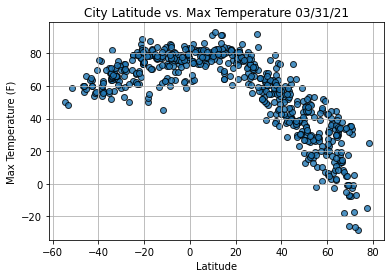

In [10]:
# Import time module for our graphs.
import time

# Build a scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Add other graph elements.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

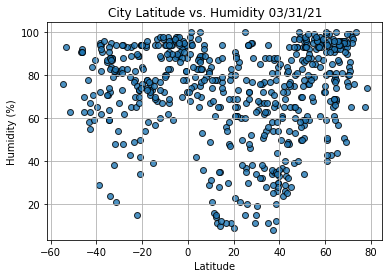

In [11]:
# Build a scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Add other graph elements.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

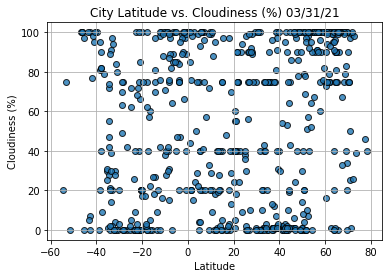

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

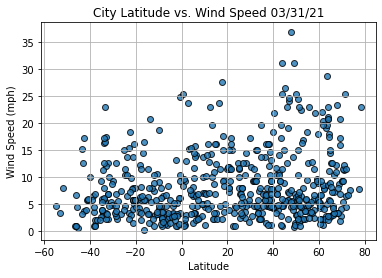

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import the linear regression module.
from scipy.stats import linregress

# Create a function to perform linear regresson on the weather data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run the regression analysis and save the results.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r-value is: {r_value} || The p-value is {p_value} || The standard error is {std_err}")
    
    # Calculate the regression line of "y-values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create the Northern and Southern hemispheres.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: -0.879575978404831 || The p-value is 3.08042214609141e-127 || The standard error is 0.03091725156682783


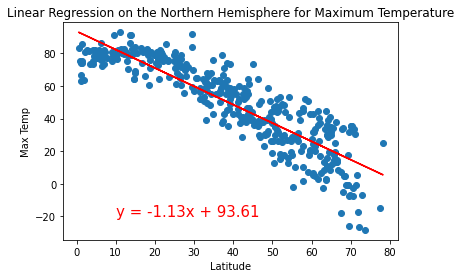

In [16]:
# Linear regression analysis of Northern Hemisphere - Latitude/Max Temperature.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                       "Max Temp", (10,-20))

The r-value is: 0.5623213846096744 || The p-value is 2.1143988204490876e-17 || The standard error is 0.04153269021649247


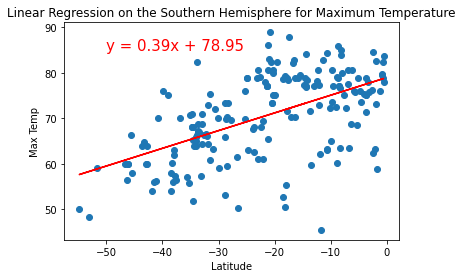

In [17]:
# Linear regression analysis of Southern Hemisphere - Latitude/Max Temperature.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature",
                       "Max Temp", (-50,85))

The r-value is: 0.2631532883804341 || The p-value is 1.3391126576332592e-07 || The standard error is 0.05724020620175941


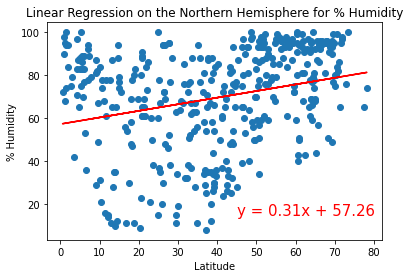

In [18]:
# Linear regression analysis of Northern Hemisphere - Latitude/Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere for % Humidity",
                       "% Humidity", (45,15))

The r-value is: 0.24139053523684953 || The p-value is 0.000743584748171712 || The standard error is 0.08590478556292701


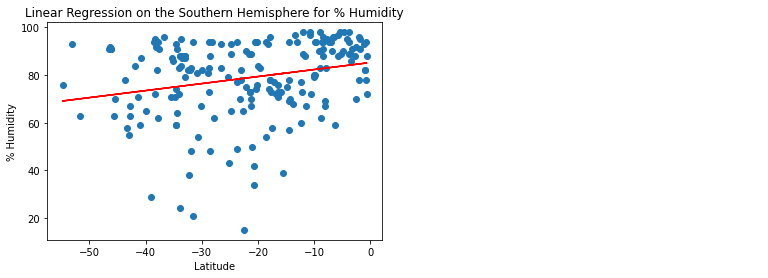

In [19]:
# Linear regression analysis of Southern Hemisphere - Latitude/Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for % Humidity",
                       "% Humidity", (45,15))

The r-value is: 0.2438520267870475 || The p-value is 1.0935832151561382e-06 || The standard error is 0.09577236553346227


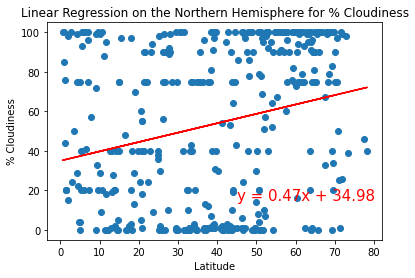

In [20]:
# Linear regression analysis of Northern Hemisphere - Latitude/Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere for % Cloudiness",
                       "% Cloudiness", (45,15))

The r-value is: 0.19862039504455473 || The p-value is 0.005749010988089332 || The standard error is 0.20182225069119167


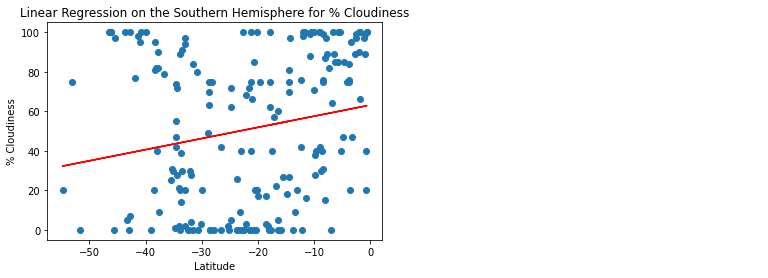

In [21]:
# Linear regression analysis of Southern Hemisphere - Latitude/Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for % Cloudiness",
                       "% Cloudiness", (45,15))

The r-value is: 0.05765142463662349 || The p-value is 0.2560340841838017 || The standard error is 0.015935968864985578


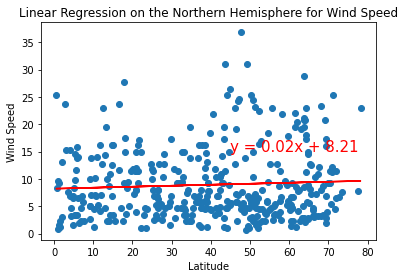

In [22]:
# Linear regression analysis of Northern Hemisphere - Latitude/Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere for Wind Speed",
                       "Wind Speed", (45,15))

The r-value is: -0.0933386141923128 || The p-value is 0.19784856607114312 || The standard error is 0.025153112136037842


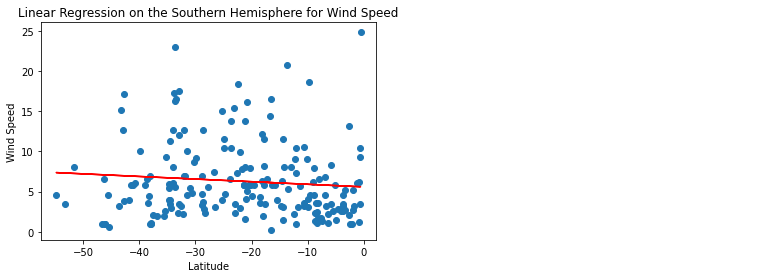

In [23]:
# Linear regression analysis of Southern Hemisphere - Latitude/Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call our function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for Wind Speed",
                       "Wind Speed", (45,15))